In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def unit_step_function(x) : 
    return np.where(x>0, 1, 0)   

In [51]:
class Perceptron : 
    def __init__(self, lr = 0.01, n_iters = 1000) : 
        self.lr = lr
        self.n_iters = n_iters
        self.activation_function = unit_step_function
        self.weights = None
        self.bias = None


    def fit(self, X, y) :
        n_samples, n_features = X.shape

        #parameters initialization
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y>0, 1, 0)

        #optimisation
        for _ in range(self.n_iters) : 
            for idx, x_i in enumerate(X) : 
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                #Perceptron parameters update
                self.weights += (self.lr * (y_[idx]-y_predicted)) * x_i
                self.bias += (self.lr * (y_[idx]-y_predicted))
                
    def predict(self, X) : 
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)

        return y_predicted        

# Test of the perceptron

In [52]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [53]:
X,y = datasets.make_blobs(
    n_samples = 200, n_features = 2, centers = 2, cluster_std = 1.05 
)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [55]:
model = Perceptron(lr = 0.01, n_iters = 10000)

In [56]:
model.fit(x_train, y_train)

In [57]:
predictions = model.predict(x_test)

In [58]:
accuracy_score(predictions, y_test)

1.0

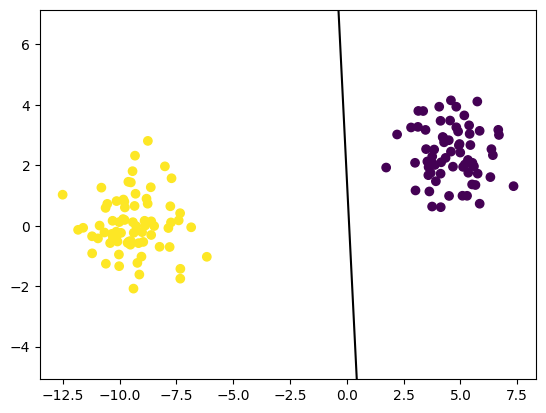

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(x_train[:, 0])
x0_2 = np.amax(x_train[:, 0])

x1_1 = (-model.weights[0] * x0_1 - model.bias) / model.weights[1]
x1_2 = (-model.weights[0] * x0_2 - model.bias) / model.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(x_train[:, 1])
ymax = np.amax(x_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()